<a href="https://colab.research.google.com/github/Soichiro-Gardinner/Prediction-of-Grocery-Sales/blob/main/Sales_Prediction_%5Bpt_3%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sales Prediction** [pt.1]

- **By:** Oscar Castanaza
- **Updated:** Mar-12-2023
- **Used:** [Python: Pandas, Matplotlib, Seaborn]

#_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _  

Importing Libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

#Data:

In [2]:
# Saving Data in df:
df = pd.read_csv("/content/Sales Pred [Week(2)].csv")

In [3]:
# Showing 5 rows:
df.head(6)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088


In [4]:
#rows and Columns:
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")   #df.shape

Rows: 8523, Columns: 12


In [5]:
index = 0 
# Cheking the column names:
for i in df.columns:
  index += 1
  print(index,i)

1 Item_Identifier
2 Item_Weight
3 Item_Fat_Content
4 Item_Visibility
5 Item_Type
6 Item_MRP
7 Outlet_Identifier
8 Outlet_Establishment_Year
9 Outlet_Size
10 Outlet_Location_Type
11 Outlet_Type
12 Item_Outlet_Sales


#_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _  

# **Data Cleaning**

 _ _ _ _ _ _ _ _ _ _**Data Types** _ _ _ _ _ _ _ _ _ _ _ _  

In [6]:
# Checking Data Types:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [7]:
#Run For simplier visibility:
"""
ind_X = 0
for i in df.columns:
  print(f"__{ind_X}__")
  print(f"_Column: {ind_X, i}, \n_Data_Types: {df[i].dtypes} \n")
  ind_X += 1
"""

'\nind_X = 0\nfor i in df.columns:\n  print(f"__{ind_X}__")\n  print(f"_Column: {ind_X, i}, \n_Data_Types: {df[i].dtypes} \n")\n  ind_X += 1\n'

# _ _ _ _ _ _ _ _ _ _**Duplicates** _ _ _ _ _ _ _ _ _ _ _ _  

In [8]:
# Looking for Duplicates:
df.duplicated().sum()

0

# _ _ _ _ _ _ _ _ _ **Identifying Missing Values**_ _ _ _ _ _ _ _ _ _ _ _ _  

In [9]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**Handling NaNs**

 5. I decided to delete them completely because there are not so many missing values
    compared to the data we have. And it will also prevent better any error while coding.



In [10]:
print("_______________Values Missing______")
print(df.isna().sum())
print("\n _____Mean of missing values___")
print(df.isna().sum().mean())
print("\n _____Not missing values___")
print((df.isna() == False).sum())

_______________Values Missing______
Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

 _____Mean of missing values___
322.75

 _____Not missing values___
Item_Identifier              8523
Item_Weight                  7060
Item_Fat_Content             8523
Item_Visibility              8523
Item_Type                    8523
Item_MRP                     8523
Outlet_Identifier            8523
Outlet_Establishment_Year    8523
Outlet_Size                  6113
Outlet_Location_Type         8523
Outlet_Type                  8523
Item_Outlet_Sales            8523
dtype: int64


In [11]:
df = df.dropna(subset = ["Outlet_Size"])

5.   Here, because its numbers I decided to use the mean() funtion  to   cover the missing values with something that is not too much but not too less.

In [12]:
# Median Filter:
median_item_weight = df['Item_Weight'].median()
df['Item_Weight'].fillna(median_item_weight, inplace=True)

<ipython-input-12-895f5775759a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Item_Weight'].fillna(median_item_weight, inplace=True)


I Used Median because it is less affected by outliers than the mean.

**re-Check for NaNs**

In [13]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# _ _ _ _ _ _ _ _ _ _**Inconsistencies** _ _ _ _ _ _ _ _ _ _ _ _  

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6113 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            6113 non-null   object 
 1   Item_Weight                6113 non-null   float64
 2   Item_Fat_Content           6113 non-null   object 
 3   Item_Visibility            6113 non-null   float64
 4   Item_Type                  6113 non-null   object 
 5   Item_MRP                   6113 non-null   float64
 6   Outlet_Identifier          6113 non-null   object 
 7   Outlet_Establishment_Year  6113 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       6113 non-null   object 
 10  Outlet_Type                6113 non-null   object 
 11  Item_Outlet_Sales          6113 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 620.9+ KB


In [15]:
for i in df.columns:
  print(df[i].value_counts().sum)

<bound method NDFrame._add_numeric_operations.<locals>.sum of NCM07    7
FDT07    7
FDN21    7
FDU12    7
FDE11    7
        ..
FDZ02    1
FDN52    1
FDG28    1
DRI59    1
FDV31    1
Name: Item_Identifier, Length: 1555, dtype: int64>
<bound method NDFrame._add_numeric_operations.<locals>.sum of 12.650    1485
12.150      58
17.600      55
13.650      49
11.800      49
          ... 
6.965        1
9.035        1
7.260        1
7.360        1
6.440        1
Name: Item_Weight, Length: 409, dtype: int64>
<bound method NDFrame._add_numeric_operations.<locals>.sum of Low Fat    3641
Regular    2076
LF          233
reg          82
low fat      81
Name: Item_Fat_Content, dtype: int64>
<bound method NDFrame._add_numeric_operations.<locals>.sum of 0.000000    382
0.076975      3
0.040912      2
0.106539      2
0.136286      2
           ... 
0.046559      1
0.073525      1
0.014568      1
0.070646      1
0.044878      1
Name: Item_Visibility, Length: 5641, dtype: int64>
<bound method NDFrame._a

Found: 
      #"reg", "LF", "low fat" inside of Item_Fat_Content 

Fixing it:

In [16]:
# Fixing it by using df.replace:
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace({"reg": "Regular", "LF":"Low Fat", "low fat": "Low Fat"})

After Fixing them:

In [17]:
values = []
for i in df["Item_Fat_Content"]:
  if i not in values:
    values.append(i)
print("Item_Fat_Content =",values)


Item_Fat_Content = ['Low Fat', 'Regular']


# _ _ _ _ _ _ _ Statistics _ _ _ _ _ _ _ _ 

In [18]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,6113.000000,6113.000000,6113.000000,6113.000000,6113.000000
mean,12.839161,0.064505,141.256859,1995.794373,2322.688445
std,4.075142,0.050092,62.229701,8.842615,1741.592093
min,4.555000,0.000000,31.290000,1985.000000,33.955800
25%,9.800000,0.026681,94.012000,1987.000000,974.731200
50%,12.650000,0.052811,143.178600,1997.000000,1928.156800
75%,15.700000,0.092834,185.892400,2004.000000,3271.075400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


#_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _  

# Part **3.**

Statistic Vizualizations:
- Histogram 
- Barchart

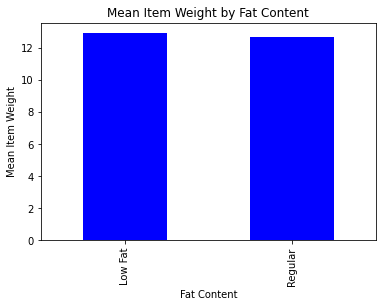

In [23]:
"""_Bar Chart_"""

# Group the data by Item_Fat_Content and calculate the mean Item_Weight for each group
grouped_data = df.groupby('Item_Fat_Content')['Item_Weight'].mean()

# Create a bar chart to visualize the mean Item_Weight for each Item_Fat_Content group
grouped_data.plot(kind='bar', color='blue')

# Add chart labels and title
plt.title('Mean Item Weight by Fat Content')
plt.xlabel('Fat Content')
plt.ylabel('Mean Item Weight')

# Display the chart
plt.show()



This code groups the data by "Item_Fat_Content" and calculates the mean "Item_Weight" for each group. It then creates a bar chart to visualize the mean "Item_Weight" for each Item_Fat_Content group, with the x-axis representing the "Item_Fat_Content" categories and the y-axis representing the mean "Item_Weight".

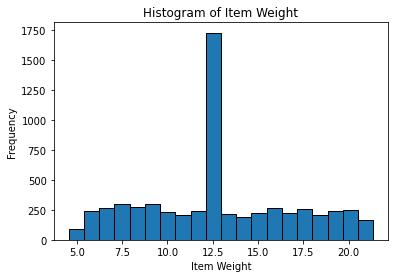

In [20]:
"""_Histogram_"""

# Create a Figure and Axes object
fig, ax = plt.subplots()

# Create the histogram using the Axes object
ax.hist(df['Item_Weight'], bins=20, edgecolor='black')

# Add labels and title
ax.set_xlabel('Item Weight')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Item Weight')

# Display the plot
plt.show()


This Histogram represents the distribution of a continuous variable.

A histogram of the "Item_Wight" distribution can help us identify the typical range of **weight** and whether there are any unusual or outlier prices. This information can be useful for setting pricing strategies or identifying pricing anomalies that may require further investigation.